In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

DESCRIBE_PERCENTILES = [0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

In [2]:
mcu = pd.read_csv("./data/mcu.csv")

## Analyzing Line Count Distributions

### Line Count by Movie (alphabetical)

In [3]:
line_count = pd.DataFrame(mcu.groupby(["movie","character"]).line.nunique())
line_count.reset_index(inplace=True)
line_count = line_count.pivot(index="character", columns="movie", values="line")
line_count.fillna(0, inplace=True)
line_count["total"] = line_count.sum(axis=1)
line_count = line_count.astype("int64")
line_count

movie,Avengers Endgame,Avengers: Infinity War,Guardians of the Galaxy Vol. 2,Iron Man,The Avengers,Thor: Ragnarok,total
character,,,,,,,
A1 CLINT BARTON,1,0,0,0,0,0,1
A1 HULK,2,0,0,0,0,0,2
A1 NATASHA,2,0,0,0,0,0,2
A1 STEVE,8,0,0,0,0,0,8
A1 THOR,6,0,0,0,0,0,6
A1 TONY,3,0,0,0,0,0,3
ABU,0,0,0,5,0,0,5
ACTOR LOKI,0,0,0,0,0,11,11
ACTOR ODIN,0,0,0,0,0,3,3


### Line Count by Movie (total line count)

In [4]:
line_count.sort_values(by="total", ascending=False)

movie,Avengers Endgame,Avengers: Infinity War,Guardians of the Galaxy Vol. 2,Iron Man,The Avengers,Thor: Ragnarok,total
character,,,,,,,
TONY STARK,163,128,0,310,170,0,771
THOR,76,77,0,0,47,343,543
BRUCE BANNER,103,49,0,0,86,66,304
PETER QUILL,10,82,210,0,0,0,302
STEVE ROGERS,131,25,0,0,127,0,283
ROCKET,59,48,139,0,0,0,246
GAMORA,22,47,125,0,0,0,194
NATASHA ROMANOFF,74,15,0,0,101,3,193
PEPPER POTTS,16,21,0,124,30,0,191


,total
count,200.000000
mean,29.790000
std,82.239239
min,1.000000
25%,1.000000
50%,4.000000
75%,17.500000
90%,80.200000
95%,135.800000
99%,306.390000


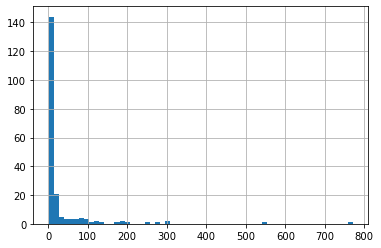

In [5]:
line_count['total'].hist(bins=60)
pd.DataFrame(line_count['total']).describe(percentiles = DESCRIBE_PERCENTILES)

## Analyzing Word Count Distributions

We might want to threshold these examples at a given number of words because it's hard to predict who said what line when the line only has few words.  The cell below provides a variable `threshold` and a table that shows how many examples are above / below the threshold number of words for each character.  The table also shows the total number of words spoken by a character in the dataset.

In [6]:
threshold = 10

above_threshold = mcu["words"] >= threshold

mcu_high_word_count = mcu[above_threshold]
mcu_low_word_count = mcu[~above_threshold]

high_word_line_count = pd.DataFrame(mcu_high_word_count.groupby("character").line.nunique())
low_word_line_count = pd.DataFrame(mcu_low_word_count.groupby("character").line.nunique())

word_count_table = high_word_line_count.join(low_word_line_count, how='outer', lsuffix=' high word count', 
                                             rsuffix=' low word count')
word_count_table.fillna(0, inplace=True)
word_count_table.columns = ["lines above threshold", "lines below threshold"]
word_count_table['total lines'] = word_count_table.sum(axis=1)
word_count_table['% lines above threshold'] = word_count_table['lines above threshold'] / word_count_table['total lines']
word_count_table['% lines below threshold'] = word_count_table['lines below threshold'] / word_count_table['total lines']
word_count_table = word_count_table.astype({'lines above threshold': "int64", 
                                            'lines below threshold': "int64",
                                            'total lines': "int64"})
word_count_table['total words'] = mcu.groupby(by="character").sum()['words']

word_count_table.sort_values(by='total words', inplace=True, ascending=False)

word_count_table

,lines above threshold,lines below threshold,total lines,% lines above threshold,% lines below threshold,total words
character,,,,,,
TONY STARK,330,439,769,0.429129,0.570871,8874
THOR,191,349,540,0.353704,0.646296,5687
BRUCE BANNER,118,181,299,0.394649,0.605351,3159
PETER QUILL,111,189,300,0.370000,0.630000,2916
ROCKET,85,161,246,0.345528,0.654472,2420
STEVE ROGERS,76,206,282,0.269504,0.730496,2363
LOKI,71,98,169,0.420118,0.579882,1837
NATASHA ROMANOFF,66,127,193,0.341969,0.658031,1713
PEPPER POTTS,57,134,191,0.298429,0.701571,1596


In [7]:
word_count_table.describe(percentiles = DESCRIBE_PERCENTILES)

,lines above threshold,lines below threshold,total lines,% lines above threshold,% lines below threshold,total words
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,10.840000,18.855000,29.695000,0.305863,0.694137,303.200000
std,31.976819,50.683806,81.902577,0.310314,0.310314,880.326618
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,0.000000,0.500000,10.000000
50%,1.000000,3.000000,4.000000,0.264238,0.735762,33.500000
75%,7.000000,11.000000,17.500000,0.500000,1.000000,180.750000
90%,28.200000,50.200000,80.200000,0.700588,1.000000,804.800000
95%,57.200000,85.650000,135.750000,1.000000,1.000000,1545.350000
99%,118.730000,207.430000,302.400000,1.000000,1.000000,3184.280000


### Words per line

,words
count,6034.000000
mean,10.049718
std,10.423449
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
90%,22.000000
95%,29.000000
99%,51.000000


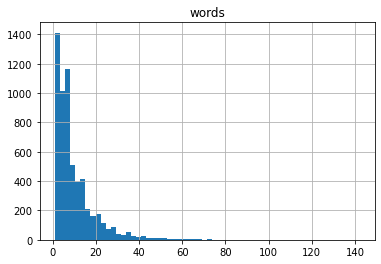

In [8]:
mcu.hist(column="words", bins=60)
pd.DataFrame(mcu["words"]).describe(percentiles = DESCRIBE_PERCENTILES)

### Total words by character

,total words
count,200.000000
mean,303.200000
std,880.326618
min,1.000000
25%,10.000000
50%,33.500000
75%,180.750000
90%,804.800000
95%,1545.350000
99%,3184.280000


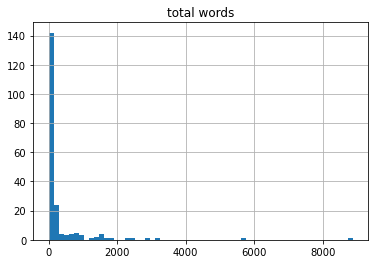

In [9]:
word_count_table.hist(column="total words", bins=60)
pd.DataFrame(word_count_table["total words"]).describe(percentiles = DESCRIBE_PERCENTILES)

## Correlation Between Word Count and Line Count

I wonder if there's a noticeable correlation between a character's `mean_word_count` and their `total_line_count`.  

**In other words, do characters with more lines have longer lines?**

Let's also correlate using `log(total_line_count)` because most characters have very few lines, but some characters have a higher number of lines.  This might make it clearer to see if there's a relationship.

In [10]:
mean_word_count = mcu.groupby('character')['words'].mean()
total_line_count = mcu.groupby('character').line.nunique()

word_line_distribution = pd.DataFrame([mean_word_count, total_line_count]).transpose()
word_line_distribution.columns = ['mean word count', 'total line count']
word_line_distribution['log(total line count)'] = np.log10(word_line_distribution['total line count'])

word_line_distribution.corr(method='pearson')

,mean word count,total line count,log(total line count)
mean word count,1.000000,0.071119,0.159586
total line count,0.071119,1.000000,0.679063
log(total line count),0.159586,0.679063,1.000000


There appears to be little correlation between `mean_word_count` and both `total_line_count` and `log(total_line_count)` (`0.137282` and `0.699299` respectively).

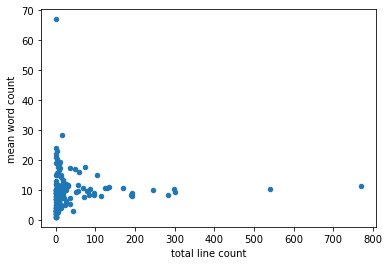

In [11]:
word_line_distribution.plot.scatter(x='total line count', y='mean word count')

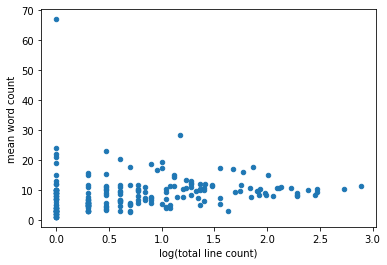

In [12]:
word_line_distribution.plot.scatter(x='log(total line count)', y='mean word count')

It appears to me that just because a character has more lines, does not mean the have longer lines.  There appears to be no strong relationship between `mean_word_count` and `total_line_count`.